In [44]:
from IPython.display import display, Image

### Question
(https://leetcode.com/problems/sort-list/)

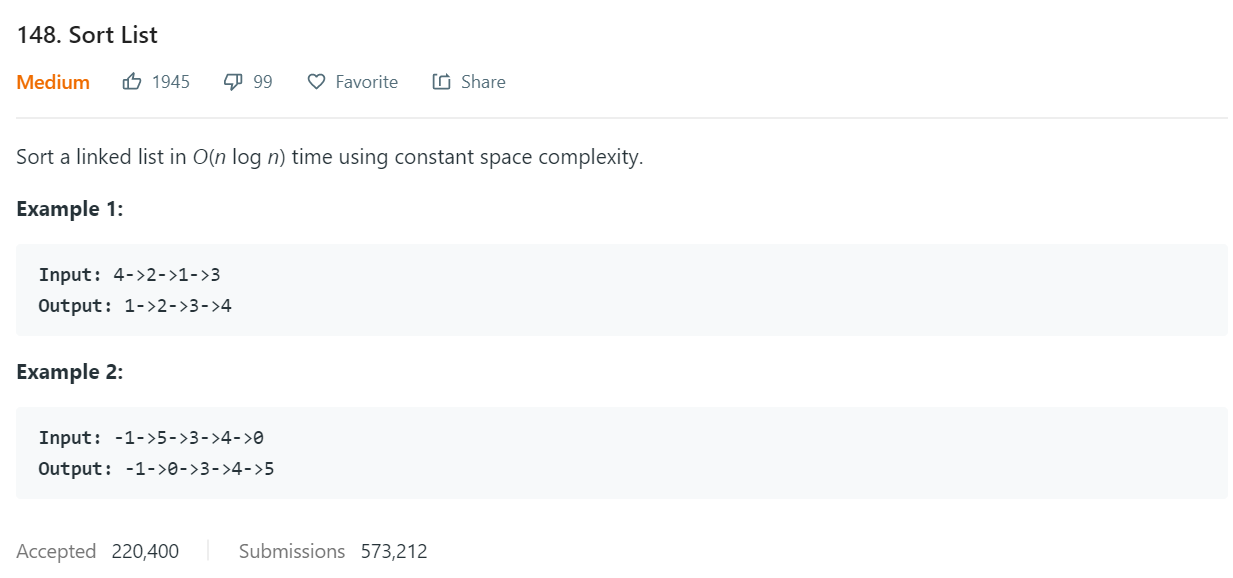

In [45]:
display(Image('../images/148_Q.PNG'))

### Solution 1: merge sort

#### code

In [46]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

In [47]:
class Solution:
    def sortList(self, head):
        if not head or not head.next:
            return head
        middle_node = self.find_middle_node(head)
        right_head = middle_node.next
        middle_node.next = None
        return self.merge(self.sortList(head), self.sortList(right_head))
        
    # 快慢指针方法
    def find_middle_node(self, head):
        slow, fast = head, head
        while fast and fast.next and fast.next.next:  # why?
            slow = slow.next
            fast = fast.next.next
        return slow
    
    def merge(self, h1, h2):
        dummy = ListNode(None)
        node = dummy
        while h1 and h2:
            if h1.val < h2.val:
                node.next = h1
                h1 = h1.next
            else:
                node.next = h2
                h2 = h2.next
            node = node.next
            
        node.next = h1 or h2
        return dummy.next

In [48]:
def gene_link_list(vals):
    dummy = ListNode(None)
    node = dummy
    for val in vals:
        tmp_node = ListNode(val)
        node.next = tmp_node
        node = node.next
    return dummy.next

In [49]:
def read_link_list(head):
    vals = []
    while head:
        vals.append(head.val)
        head = head.next
    # print(vals)
    return vals

#### test

In [50]:
nums = [4, 2, 1, 3]

In [51]:
s = Solution()

In [52]:
head = s.sortList(gene_link_list(nums))

In [53]:
read_link_list(head)

[1, 2, 3, 4]

#### submit

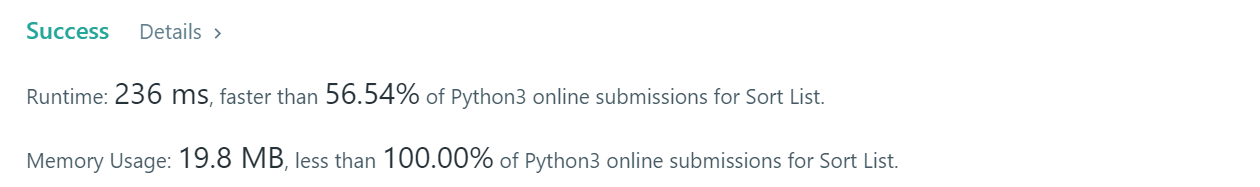

In [54]:
display(Image('../images/148_S1.PNG'))

### Solution 2: merge sort (simpler)

#### code

In [55]:
class Solution:
    def merge(self, h1, h2):
        dummy = tail = ListNode(None)
        while h1 and h2:
            if h1.val < h2.val:
                tail.next, tail, h1 = h1, h1, h1.next
            else:
                tail.next, tail, h2 = h2, h2, h2.next
        tail.next = h1 or h2
        return dummy.next
    
    def sortList(self, head):
        if not head or not head.next:
            return head
    
        pre, slow, fast = None, head, head
        while fast and fast.next:
            pre, slow, fast = slow, slow.next, fast.next.next
        pre.next = None  # clip head

        return self.merge(*map(self.sortList, (head, slow)))

#### test

In [56]:
s = Solution()

In [57]:
head = s.sortList(gene_link_list(nums))

In [58]:
read_link_list(head)

[1, 2, 3, 4]

#### submit

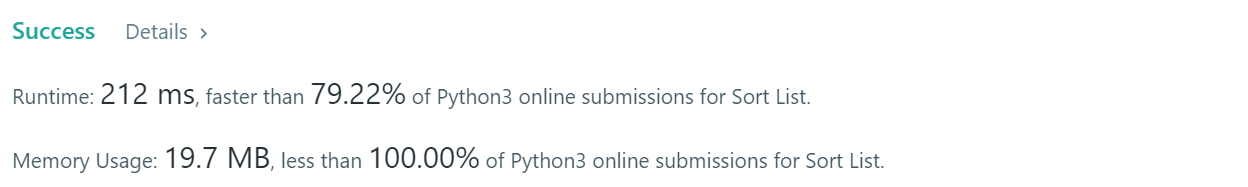

In [59]:
display(Image('../images/148_S2.PNG'))